In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [226]:
df = pd.read_csv('/Users/Acer/Desktop/DAA-Group-2-Internal-Project/HDB_Resale_Prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


#### Basic cleaning

In [227]:
# Basic data cleaning
df = df.dropna().drop_duplicates() # Remove missing values and duplicates
df.info() # Check the info again after cleaning


<class 'pandas.core.frame.DataFrame'>
Index: 193876 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                193876 non-null  object 
 1   town                 193876 non-null  object 
 2   flat_type            193876 non-null  object 
 3   block                193876 non-null  object 
 4   street_name          193876 non-null  object 
 5   storey_range         193876 non-null  object 
 6   floor_area_sqm       193876 non-null  float64
 7   flat_model           193876 non-null  object 
 8   lease_commence_date  193876 non-null  int64  
 9   remaining_lease      193876 non-null  object 
 10  resale_price         193876 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.7+ MB


#### Formatting data

In [228]:
# Convert month to datetime
# Extract year and quarter for analysis
df["month"] = pd.to_datetime(df['month']) # Convert month to datetime
df["year"] = df["month"].dt.year # Extract year
df["quarter"] = df["month"].dt.quarter # Extract quarter

In [229]:
# Convert storey_range to numerical by taking the average of the range
df[["storey_min", "storey_max"]] = df["storey_range"].str.split(" TO ", expand=True).astype(int) # Split and convert to int
df["storey_avg"] = (df["storey_min"] + df["storey_max"]) / 2 # Calculate average storey
df = df.drop(columns=["storey_range","storey_min", "storey_max"]) # Drop original storey_range and temporary columns


In [230]:
# Calculate lease age
df["lease_age"] = df["month"].dt.year - df["lease_commence_date"] # Calculate lease age
df = df.drop(columns=["lease_commence_date"]) # Drop original lease_commence_date column 

In [231]:
# Converting 'remaining_lease' to numerical values
df["remaining_lease"] = df["remaining_lease"].str.lower().str.strip() # Standardize text 
years = df["remaining_lease"].str.extract(r"(\d+)\s*year").astype("float") # Extract years
months = df["remaining_lease"].str.extract(r"(\d+)\s*month").fillna(0).astype("float") # Extract months, fill NaN with 0
df["remaining_lease_years"] = years + months / 12 # Convert total to years

In [232]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,year,quarter,storey_avg,lease_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,61 years 04 months,232000.0,2017,1,11.0,38,61.333333
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,60 years 07 months,250000.0,2017,1,2.0,39,60.583333
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,262000.0,2017,1,2.0,37,62.416667
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,62 years 01 month,265000.0,2017,1,5.0,37,62.083333
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,265000.0,2017,1,2.0,37,62.416667


#### Checking features for outlier

<Axes: ylabel='floor_area_sqm'>

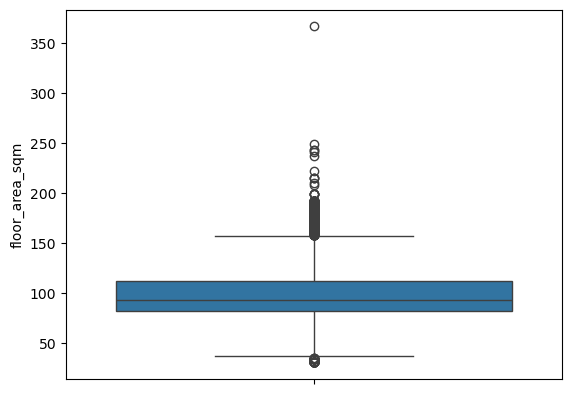

In [233]:
# Checking for outlier in "floor_area_sqm"
sns.boxplot(df["floor_area_sqm"])

In [234]:
# Remove the outlier that is more than 350 sqm
threshold_floor = 350 # Set a threshold for floor area <= 350 sqm
df = df[df["floor_area_sqm"] <= threshold_floor] # Filter out the outlier

#### Final check

In [235]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,year,quarter,storey_avg,lease_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,61 years 04 months,232000.0,2017,1,11.0,38,61.333333
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,60 years 07 months,250000.0,2017,1,2.0,39,60.583333
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,262000.0,2017,1,2.0,37,62.416667
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,62 years 01 month,265000.0,2017,1,5.0,37,62.083333
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,265000.0,2017,1,2.0,37,62.416667


In [236]:
df.to_csv('Cleaned_HDB_Resale_Prices.csv', index=False)
